The first step is to import the data from the local machine into Google Colab. We use the pandas libarry to read the excel file into a dataframe.We then print the data head.

In [ ]:
from google.colab import files
import pandas
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
myFrame = pandas.read_excel(file_path)
print(myFrame.head())


Saving attachment_2.xls to attachment_2 (1).xls
   Feature1  Feature2  Feature3   Feature4
0  0.675659  3.135204  4.654452   7.941249
1  0.014449  5.309092  4.433138   8.116491
2  1.509237  2.826058  8.858981  10.634407
3  0.119585  8.305300  5.409522  15.707786
4 -0.707040  8.272313  6.227519   9.795239


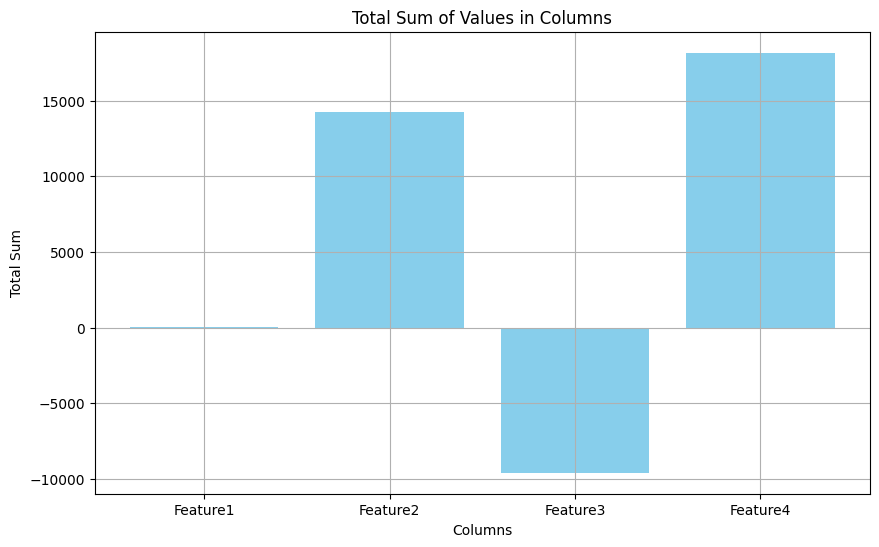

In [56]:
import matplotlib.pyplot
columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4']
column_sums = [myFrame[column].sum() for column in columns]
matplotlib.pyplot.figure(figsize=(10, 6))
matplotlib.pyplot.bar(columns, column_sums, color='skyblue')
matplotlib.pyplot.xlabel('Columns')
matplotlib.pyplot.ylabel('Total Sum')
matplotlib.pyplot.title('Total Sum of Values in Columns')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.show()


After importing the data into a frame, we plot the data before cleaning. Below it shows two plots, a bar plot and a line plot.

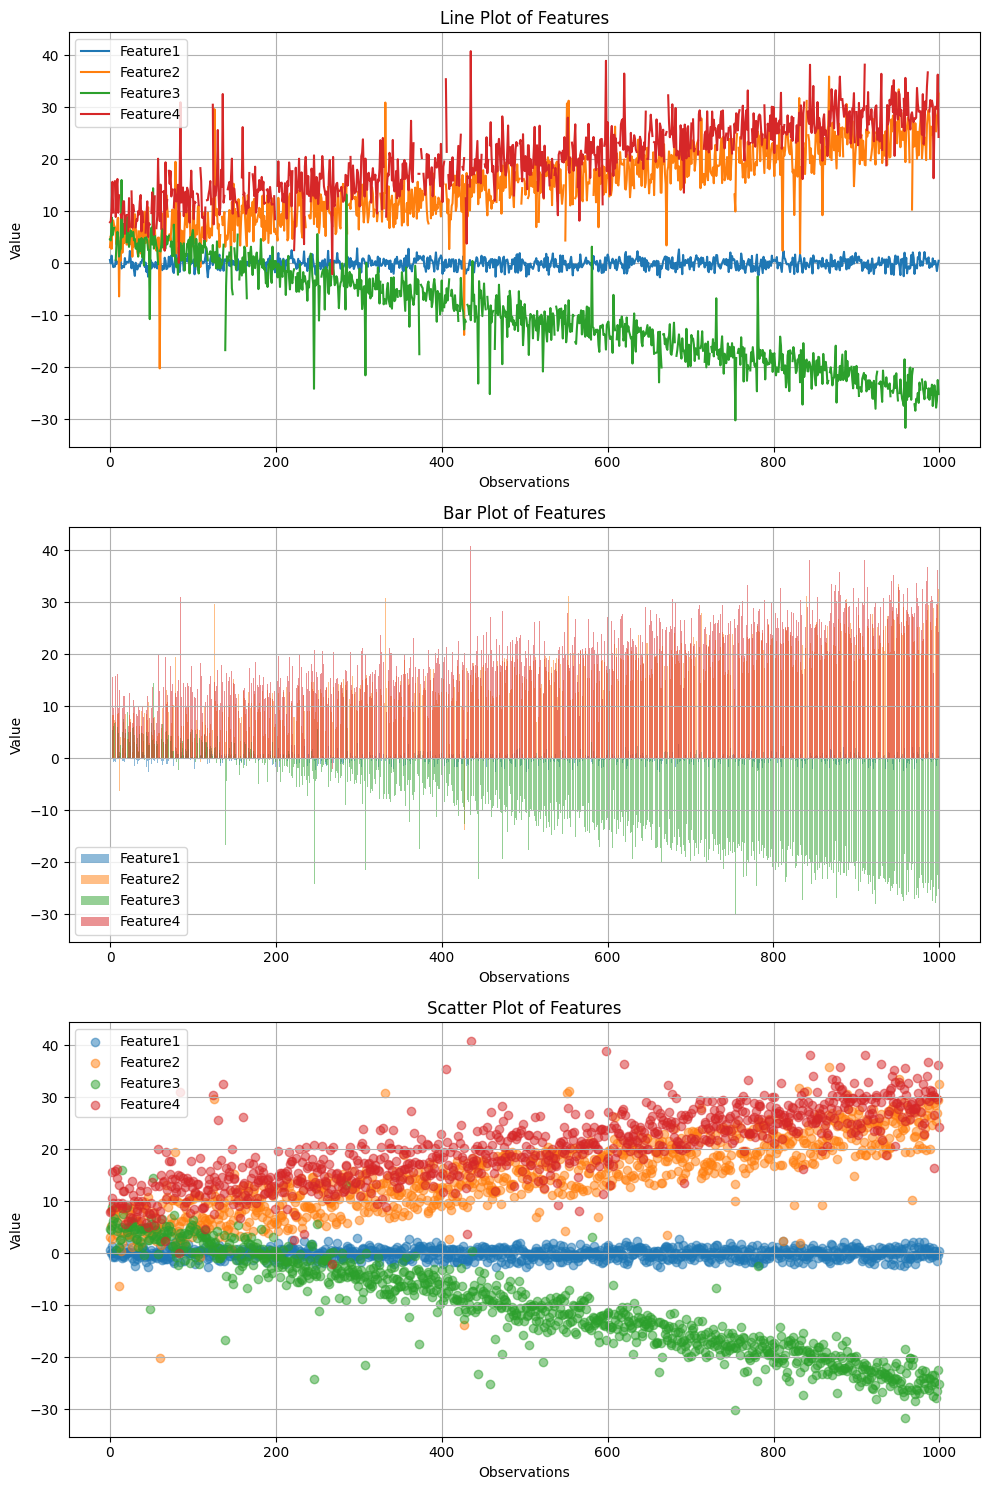

In [57]:
x_values = range(len(myFrame))
fig, axes = matplotlib.pyplot.subplots(3, 1, figsize=(10, 15))
for column in myFrame.columns:
    axes[0].plot(x_values, myFrame[column], label=column)
axes[0].set_xlabel('Observations')
axes[0].set_ylabel('Value')
axes[0].set_title('Line Plot of Features')
axes[0].legend()
axes[0].grid(True)
for column in myFrame.columns:
    axes[1].bar(x_values, myFrame[column], label=column, alpha=0.5)
axes[1].set_xlabel('Observations')
axes[1].set_ylabel('Value')
axes[1].set_title('Bar Plot of Features')
axes[1].legend()
axes[1].grid(True)
for column in myFrame.columns:
    axes[2].scatter(x_values, myFrame[column], label=column, alpha=0.5)
axes[2].set_xlabel('Observations')
axes[2].set_ylabel('Value')
axes[2].set_title('Scatter Plot of Features')
axes[2].legend()
axes[2].grid(True)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

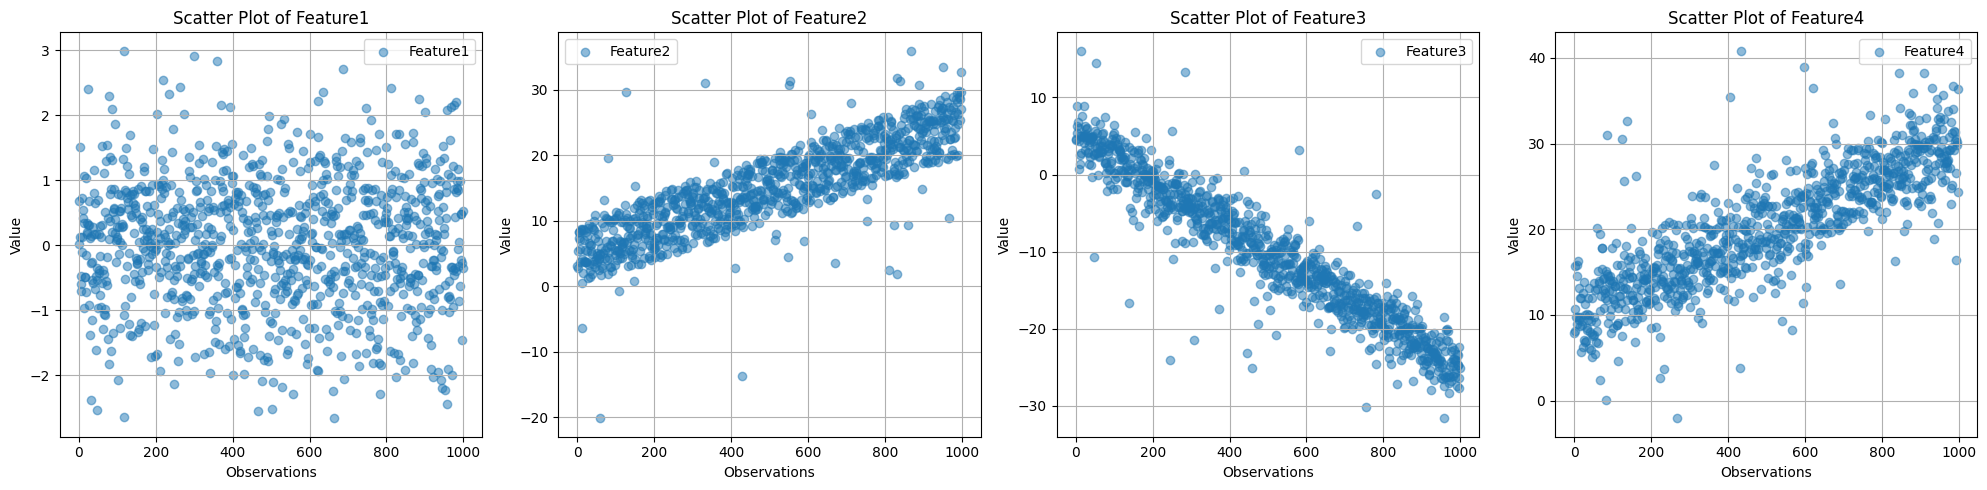

In [58]:
x_values = range(len(myFrame))
num_features = len(myFrame.columns)
fig, axes = matplotlib.pyplot.subplots(1, num_features, figsize=(5*num_features, 5))
for i, column in enumerate(myFrame.columns):
    axes[i].scatter(x_values, myFrame[column], label=column, alpha=0.5)
    axes[i].set_xlabel('Observations')
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Scatter Plot of {column}')
    axes[i].legend()
    axes[i].grid(True)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [59]:

missing_values_count = myFrame.isna().sum()
print("Missing Values Count:")
print(missing_values_count)


Missing Values Count:
Feature1      0
Feature2     50
Feature3     50
Feature4    100
dtype: int64


In this step we clean the dataset by dropping all empty and null values.

In [ ]:

myFrame_cleaned = myFrame.dropna()
print(myFrame_cleaned)


     Feature1   Feature2   Feature3   Feature4
0    0.675659   3.135204   4.654452   7.941249
1    0.014449   5.309092   4.433138   8.116491
2    1.509237   2.826058   8.858981  10.634407
3    0.119585   8.305300   5.409522  15.707786
4   -0.707040   8.272313   6.227519   9.795239
..        ...        ...        ...        ...
994  0.474118  29.760462 -23.414378  26.614353
995  0.482475  28.519342 -24.700859  30.126990
997 -1.455395  27.089005 -26.399074  29.785043
998 -0.350659  29.606772 -22.405537  36.320879
999  0.528274  32.673637 -25.111548  24.331162

[807 rows x 4 columns]


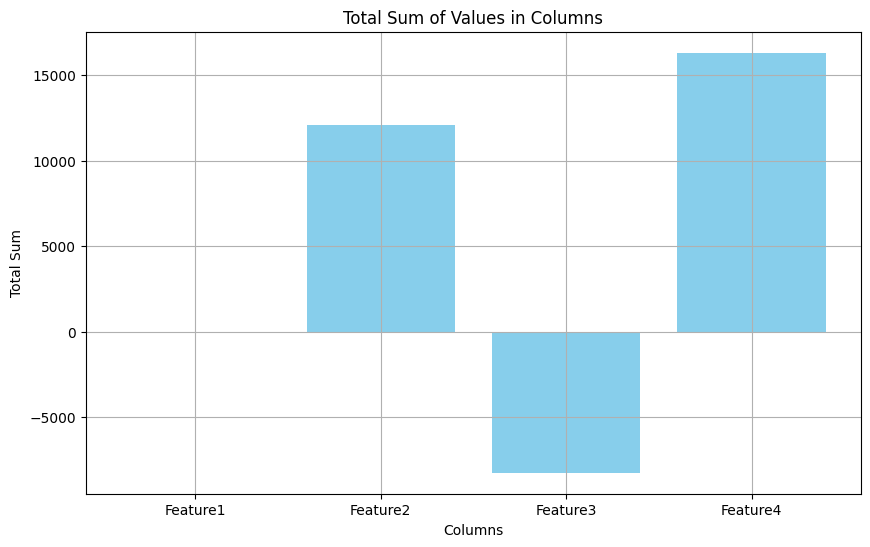

In [60]:
columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4']
column_sums = [myFrame_cleaned[column].sum() for column in columns]
matplotlib.pyplot.figure(figsize=(10, 6))
matplotlib.pyplot.bar(columns, column_sums, color='skyblue')
matplotlib.pyplot.xlabel('Columns')
matplotlib.pyplot.ylabel('Total Sum')
matplotlib.pyplot.title('Total Sum of Values in Columns')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.show()

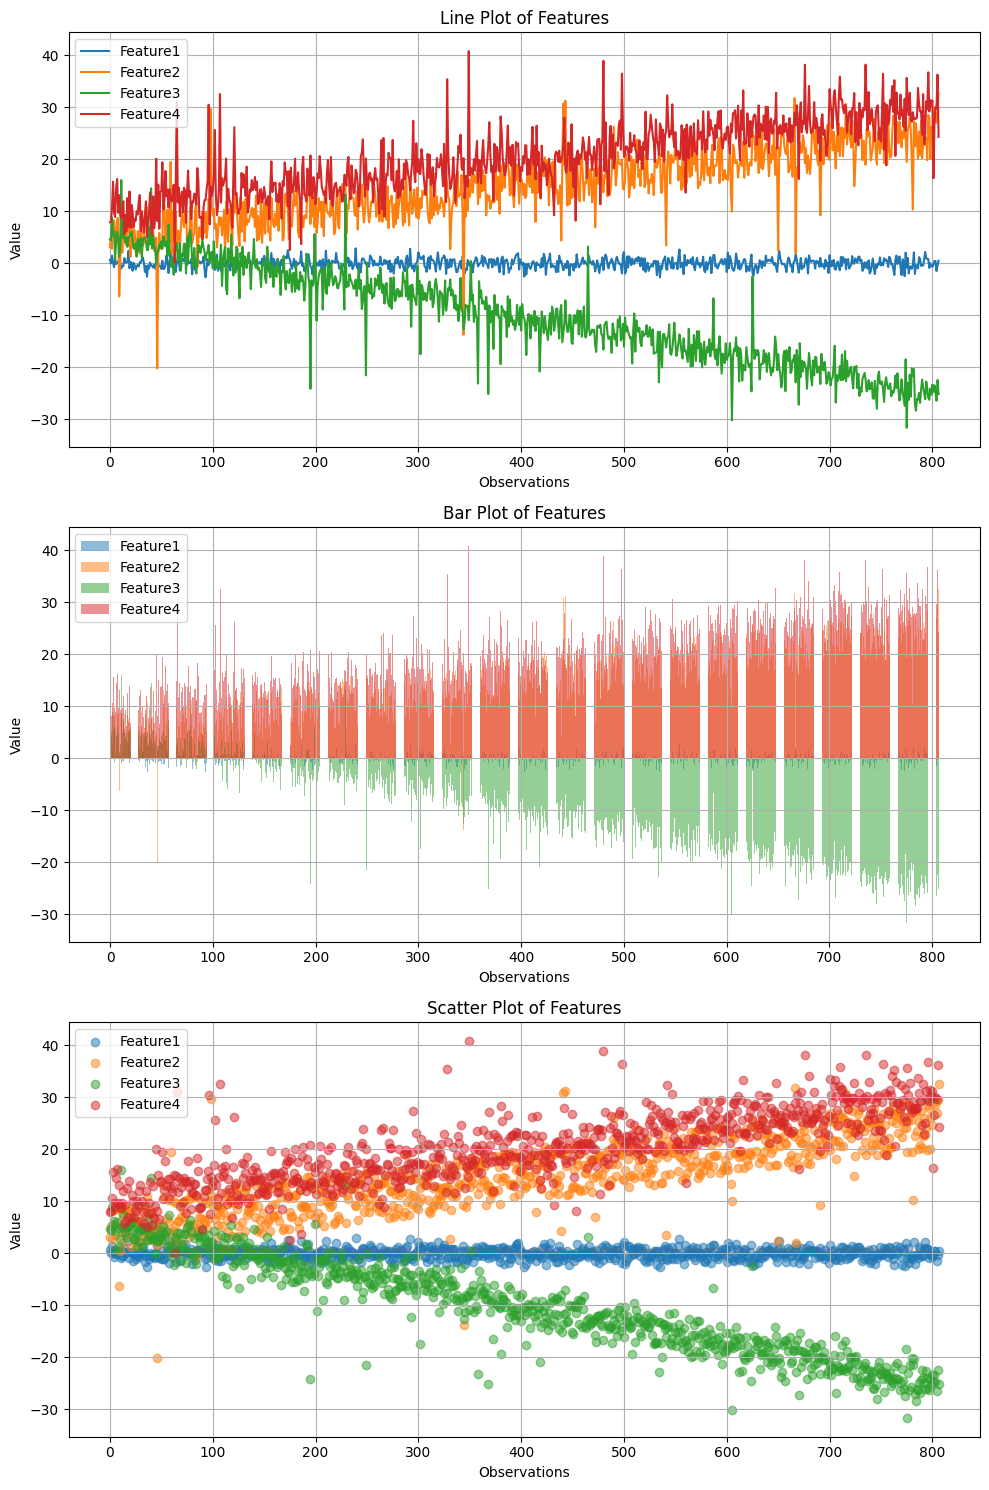

In [61]:
x_values = range(len(myFrame_cleaned))
fig, axes = matplotlib.pyplot.subplots(3, 1, figsize=(10, 15))
for column in myFrame_cleaned.columns:
    axes[0].plot(x_values, myFrame_cleaned[column], label=column)
axes[0].set_xlabel('Observations')
axes[0].set_ylabel('Value')
axes[0].set_title('Line Plot of Features')
axes[0].legend()
axes[0].grid(True)
for column in myFrame_cleaned.columns:
    axes[1].bar(x_values, myFrame_cleaned[column], label=column, alpha=0.5)
axes[1].set_xlabel('Observations')
axes[1].set_ylabel('Value')
axes[1].set_title('Bar Plot of Features')
axes[1].legend()
axes[1].grid(True)
for column in myFrame_cleaned.columns:
    axes[2].scatter(x_values, myFrame_cleaned[column], label=column, alpha=0.5)
axes[2].set_xlabel('Observations')
axes[2].set_ylabel('Value')
axes[2].set_title('Scatter Plot of Features')
axes[2].legend()
axes[2].grid(True)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()



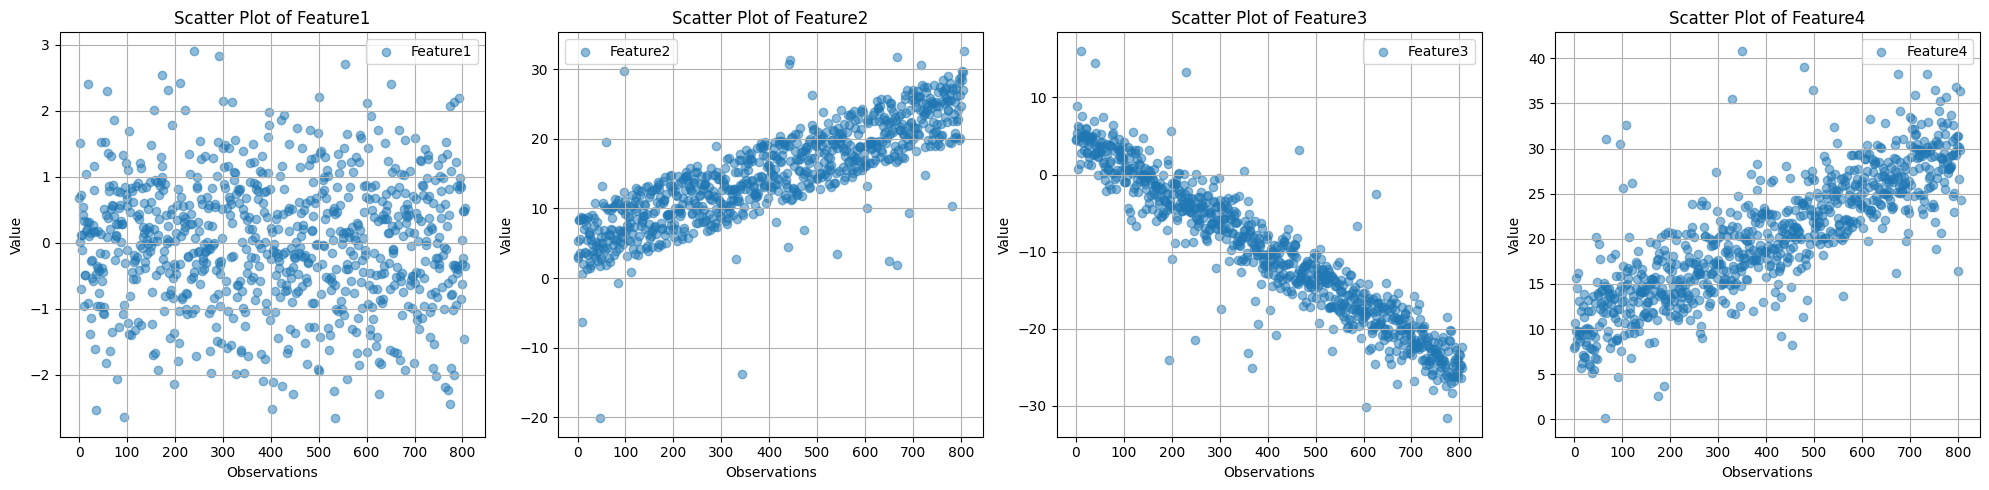

In [62]:

x_values = range(len(myFrame_cleaned))
num_features = len(myFrame_cleaned.columns)
fig, axes = matplotlib.pyplot.subplots(1, num_features, figsize=(5*num_features, 5))
for i, column in enumerate(myFrame_cleaned.columns):
    axes[i].scatter(x_values, myFrame_cleaned[column], label=column, alpha=0.5)
    axes[i].set_xlabel('Observations')
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Scatter Plot of {column}')
    axes[i].legend()
    axes[i].grid(True)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()


In [66]:
iqr_values = {}
for feature in myFrame_cleaned.columns:
    q1 = myFrame_cleaned[feature].quantile(0.25)
    q3 = myFrame_cleaned[feature].quantile(0.75)
    iqr = q3 - q1
    iqr_values[feature] = iqr
for feature, iqr in iqr_values.items():
    print(f"IQR for {feature}: {iqr}")


IQR for Feature1: 1.2721851935
IQR for Feature2: 9.843954118499997
IQR for Feature3: 14.820197677500001
IQR for Feature4: 10.575803935000003


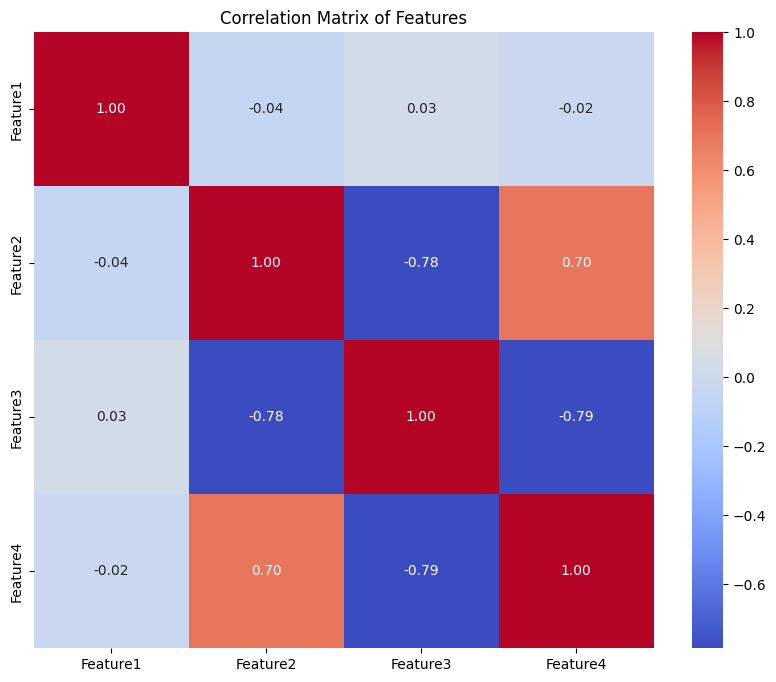

In [63]:
import seaborn
features_for_correlation = myFrame_cleaned[['Feature1', 'Feature2', 'Feature3', 'Feature4']]
correlation_matrix = features_for_correlation.corr()
matplotlib.pyplot.figure(figsize=(10, 8))
seaborn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
matplotlib.pyplot.title('Correlation Matrix of Features')
matplotlib.pyplot.show()


In [64]:
import statsmodels.api
X = myFrame_cleaned[['Feature2', 'Feature3', 'Feature4']]
X = statsmodels.api.add_constant(X)
y = myFrame_cleaned['Feature1']
model = statsmodels.api.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               Feature1   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5101
Date:                Fri, 15 Mar 2024   Prob (F-statistic):              0.675
Time:                        09:05:15   Log-Likelihood:                -1122.3
No. Observations:                 807   AIC:                             2253.
Df Residuals:                     803   BIC:                             2271.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0544      0.135      0.403      0.6

In [ ]:

myFrame_cleaned.to_csv('/content/cleaned_dataset.csv', index=False)

